Data Set: Breast cancer predictions (32 variables, 569 rows)
https://www.kaggle.com/datasets/kabshaansariya/breast-cancer


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

from scipy.stats import jarque_bera
from scipy.stats import normaltest



In [ ]:
cancer_data = pd.read_csv('/content/drive/MyDrive/kaggle/breast_cancer.csv')

In [ ]:
cancer_data.shape

(569, 33)

In [ ]:

cancer_data.info()

# no null values except the last column which is all nulls
# diagnosis is only non-numeric value, can make dummies for this

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#show unique values for diagnosis
cancer_data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
#get dummies for categorical values for diagnosis
pd.get_dummies(cancer_data['diagnosis'])

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
564,0,1
565,0,1
566,0,1
567,0,1


In [ ]:
# add diagnosis dummies to dataframe
cancer_data = pd.concat([cancer_data, pd.get_dummies(cancer_data['diagnosis'])], axis = 1)

cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#drop the original categorical diagnosis column
cancer_data = cancer_data.drop(['diagnosis'], axis = 1)

In [ ]:
#drop the benign column
cancer_data = cancer_data.drop(['B'], axis = 1)


In [ ]:
#rename the M column to diagnosis_binary
cancer_data.rename(columns = {'M' : 'diagnosis_bin'}, inplace = True)

#check that all the changes went through
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
#remove the feature that is just nulls and save the dataset
cancer_data = cancer_data.drop(['Unnamed: 32'], axis = 1)
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
#check if the data is balanced
pd.value_counts(cancer_data['diagnosis_bin'])

0    357
1    212
Name: diagnosis_bin, dtype: int64

There are 357 values (63% of values) for benign tumors and 212 values (37% of values) for malignant tumors, so it is not perfectly balanced, but not severely imbalanced either.

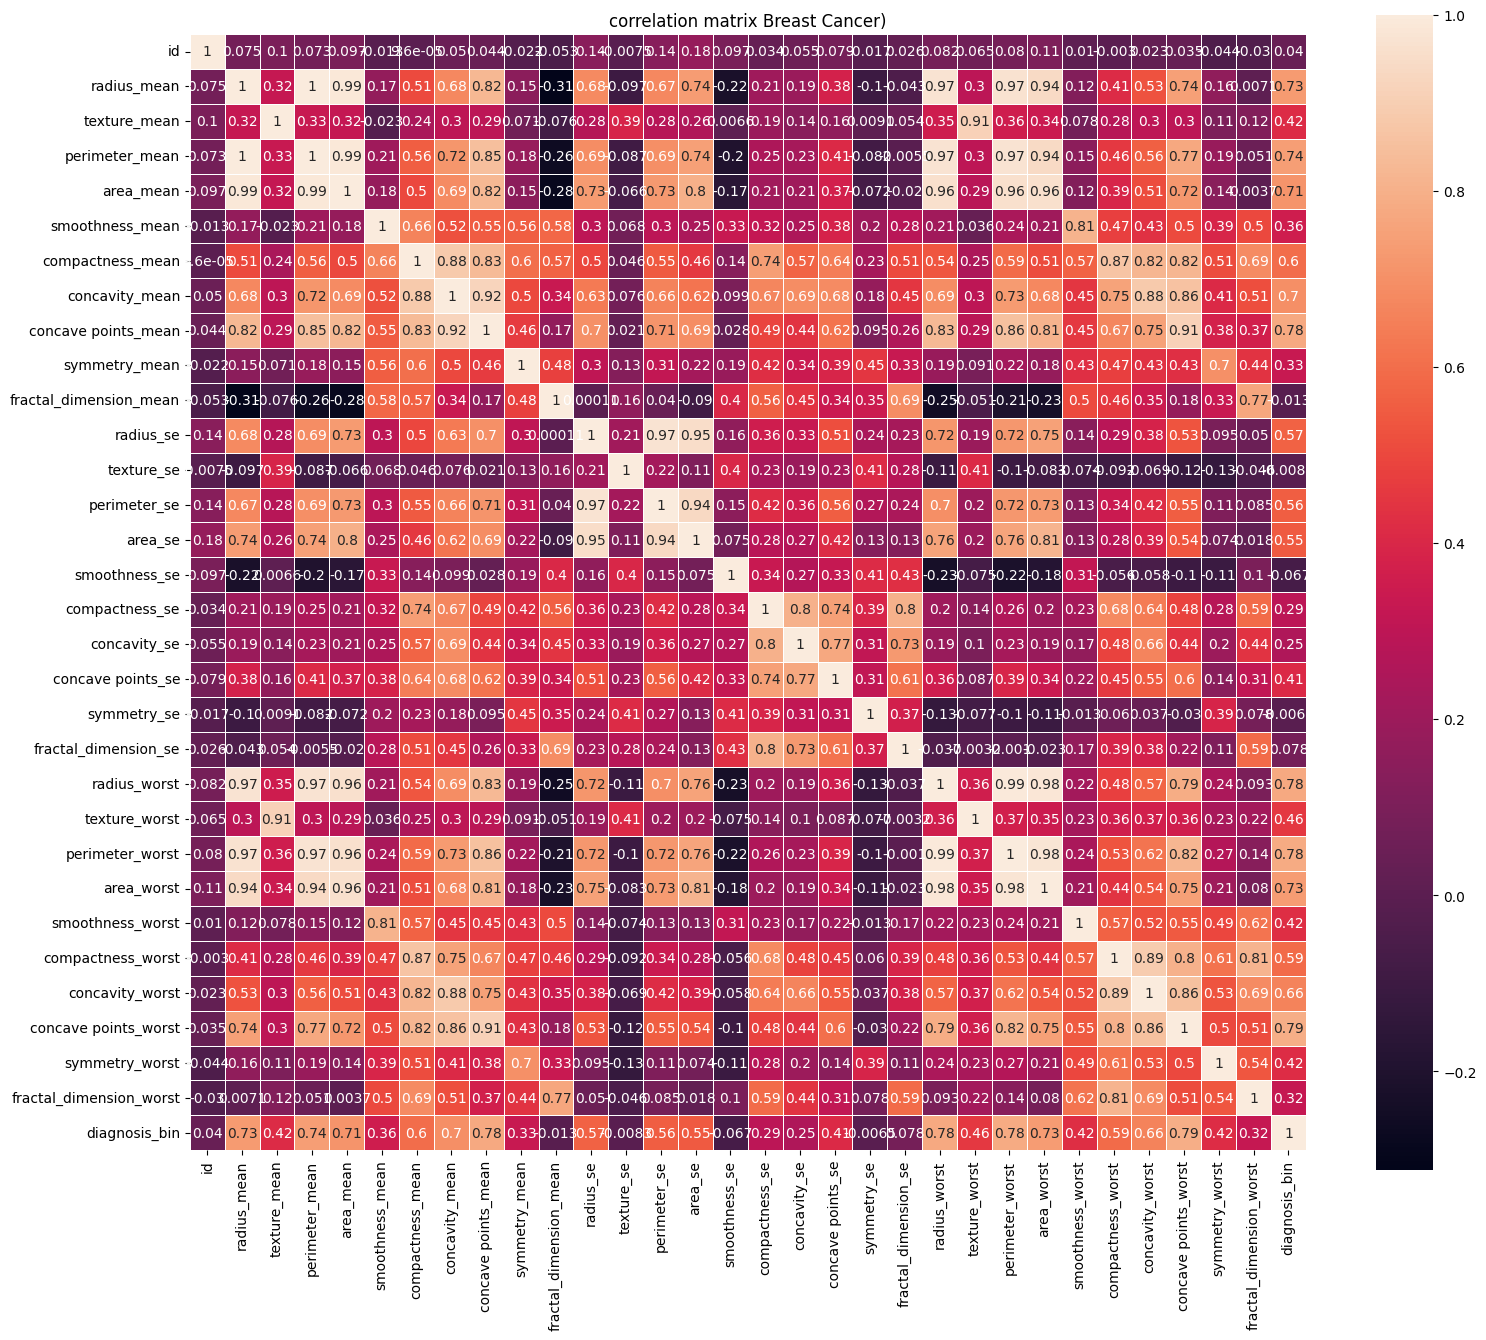

In [ ]:

# Make the correlation matrices
corrmat_cancer = cancer_data.corr()

#resize the figure
plt.figure(figsize=(18,15))

#draw a heatmap for the data
sns.heatmap(corrmat_cancer, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix Breast Cancer)")


plt.show()


Features that are highly correlated with diagnosis:

*   radius_mean (73%)
*   perimeter_mean (74%)
*   area_mean (71%)
*   compactness_mean (60%)
*   concavity_mean (70%)
*   concave points_mean (78%)
*   radius_worst (78%)
*   perimeter_worst (78%)
*   area_worst (73%)
*   concavirty_worst (66%)
*   concave points_worst (79%)


Lower correlation, but still  relevant:
*   symmetry_mean (33%)
*   radius_se (57%)
*   perimeter_se (56%)
*   area_se (55%)
*   concave points_se (41%)
*   texture_worst (46%)
*   smoothness_worst (42%)
*   compactness_worst (59%)
*   symmetry_worst (42%)
*   fractal dimension_worst (32%)







The mean measurement data seems highly correlated with the worst measurement data, so probably should use just one or the other for the model. The se data is less correlated with the target so probably not a good choice.

The mean data has the most variables over 70% correlated with the target, so we will start there.

Separate the mean measurements into their own dataframe with the target variable. (We will leave out the fractal dimension mean because that has almost no correlation with the target feature)

In [ ]:
mean_df = cancer_data[[
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
    'concavity_mean',
    'concave points_mean',
    'symmetry_mean',
    'diagnosis_bin']]
mean_df.info()
mean_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   radius_mean          569 non-null    float64
 1   texture_mean         569 non-null    float64
 2   perimeter_mean       569 non-null    float64
 3   area_mean            569 non-null    float64
 4   smoothness_mean      569 non-null    float64
 5   compactness_mean     569 non-null    float64
 6   concavity_mean       569 non-null    float64
 7   concave points_mean  569 non-null    float64
 8   symmetry_mean        569 non-null    float64
 9   diagnosis_bin        569 non-null    uint8  
dtypes: float64(9), uint8(1)
memory usage: 40.7 KB


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,diagnosis_bin
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,1


Once we have the mean data in its own dataframe, lets look at some descriptive statistics and distribution for the different variables

In [ ]:
mean_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,diagnosis_bin
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,1.000000


Some of the data have very small ranges and standard distributions (smoothness, compactness, concavity, concave points, symmetry). These make sense as most of these measurements are very small and we would not expect a very wide range for these variables.

The area mean has a very large standard deviation measurement, so we will examine that more closely on the histograms.  

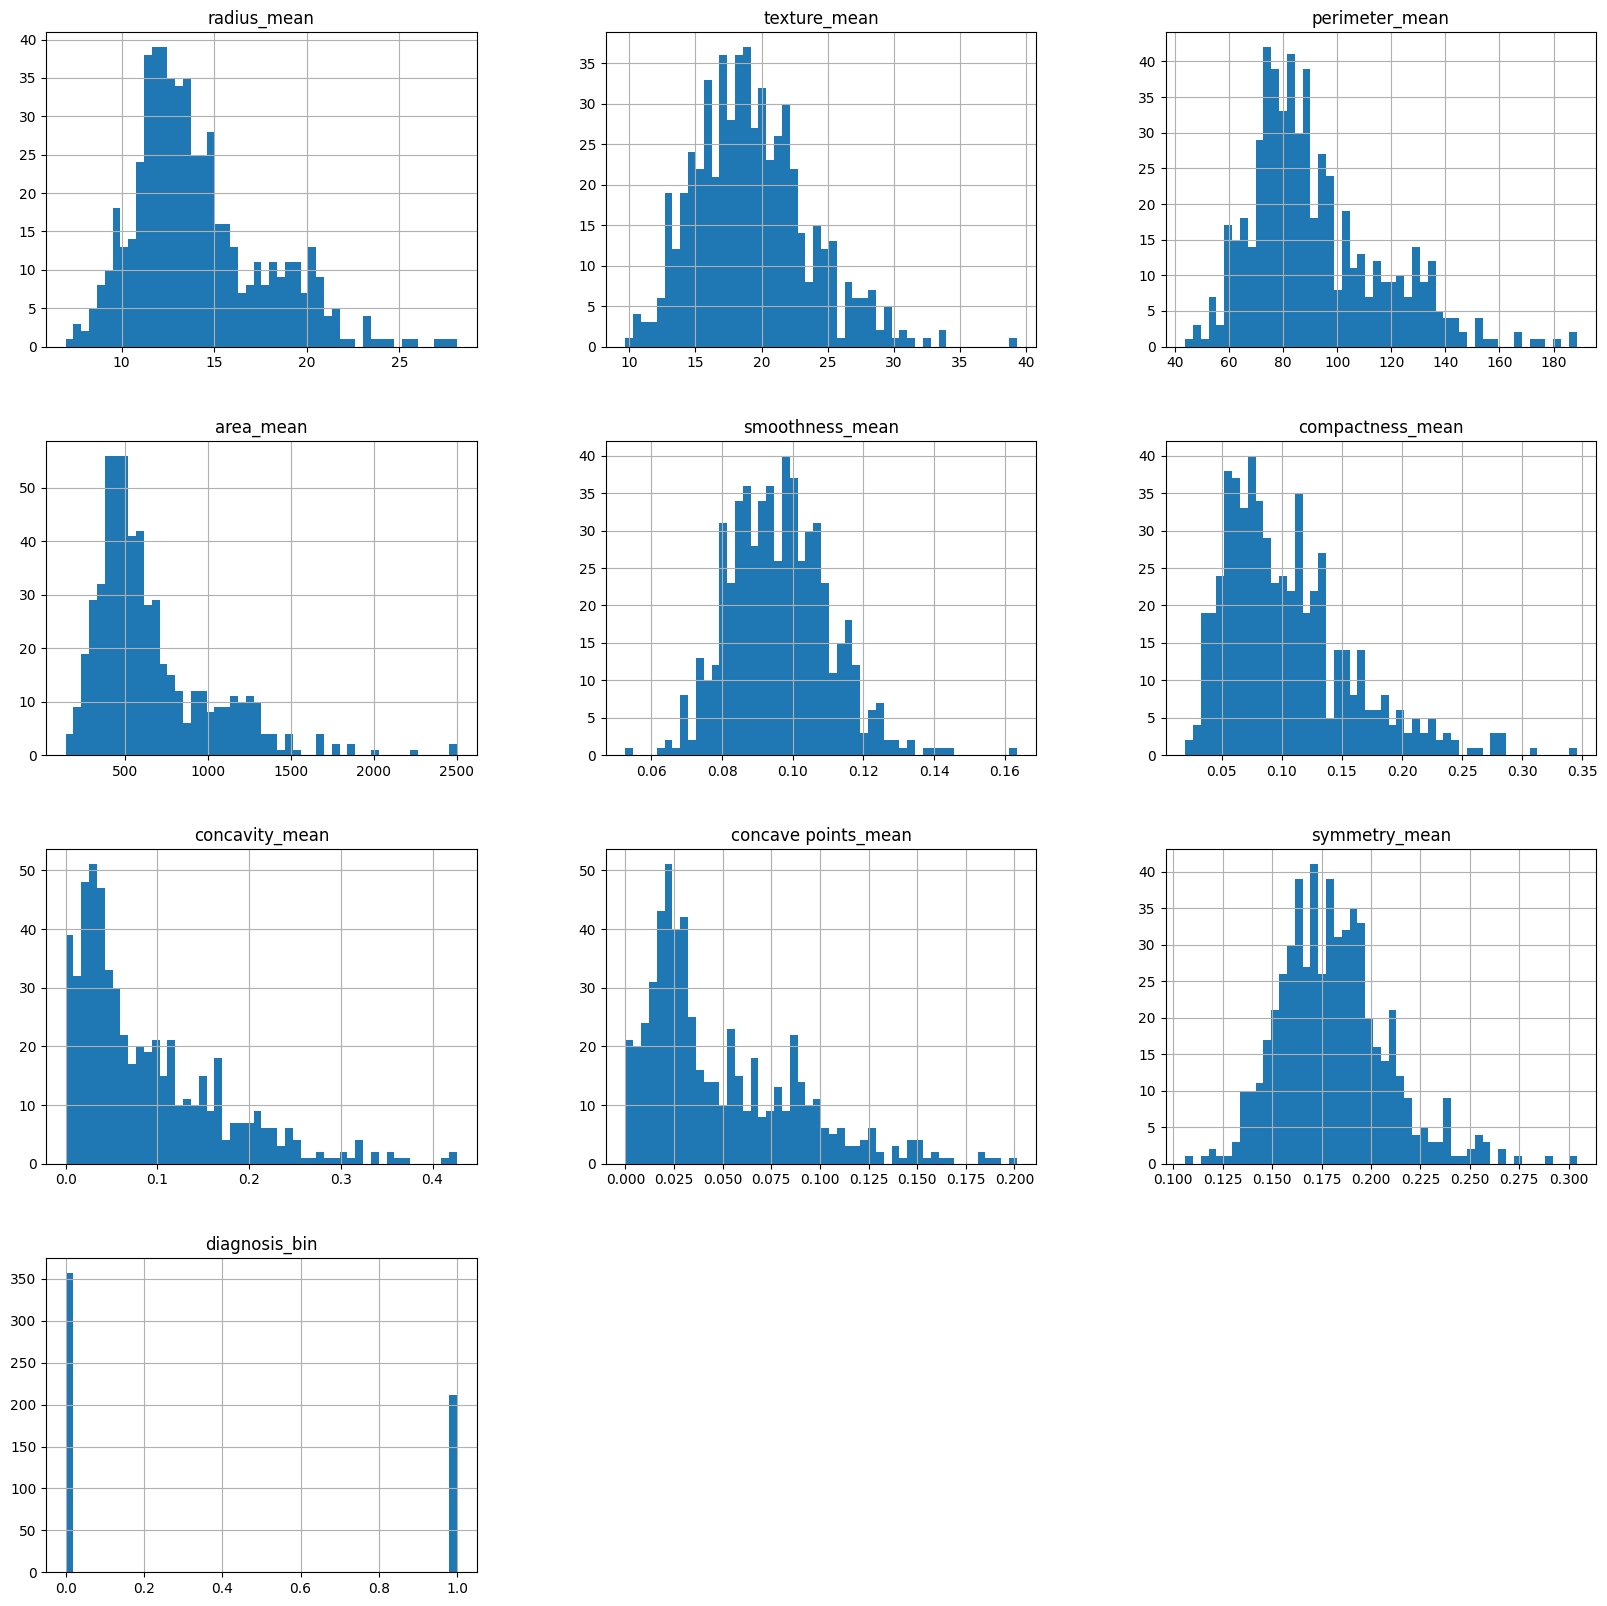

In [ ]:
mean_df.hist(bins=50, figsize=(20,20))
plt.show()

A number of the variables look like they have some outliers in the data, mostly on the higher end. Let's look at a scatter plot of the variables with the target to see the relationship of the variable with the target, and make a determineation of whether the outliers may affect the ability to accurately classify.

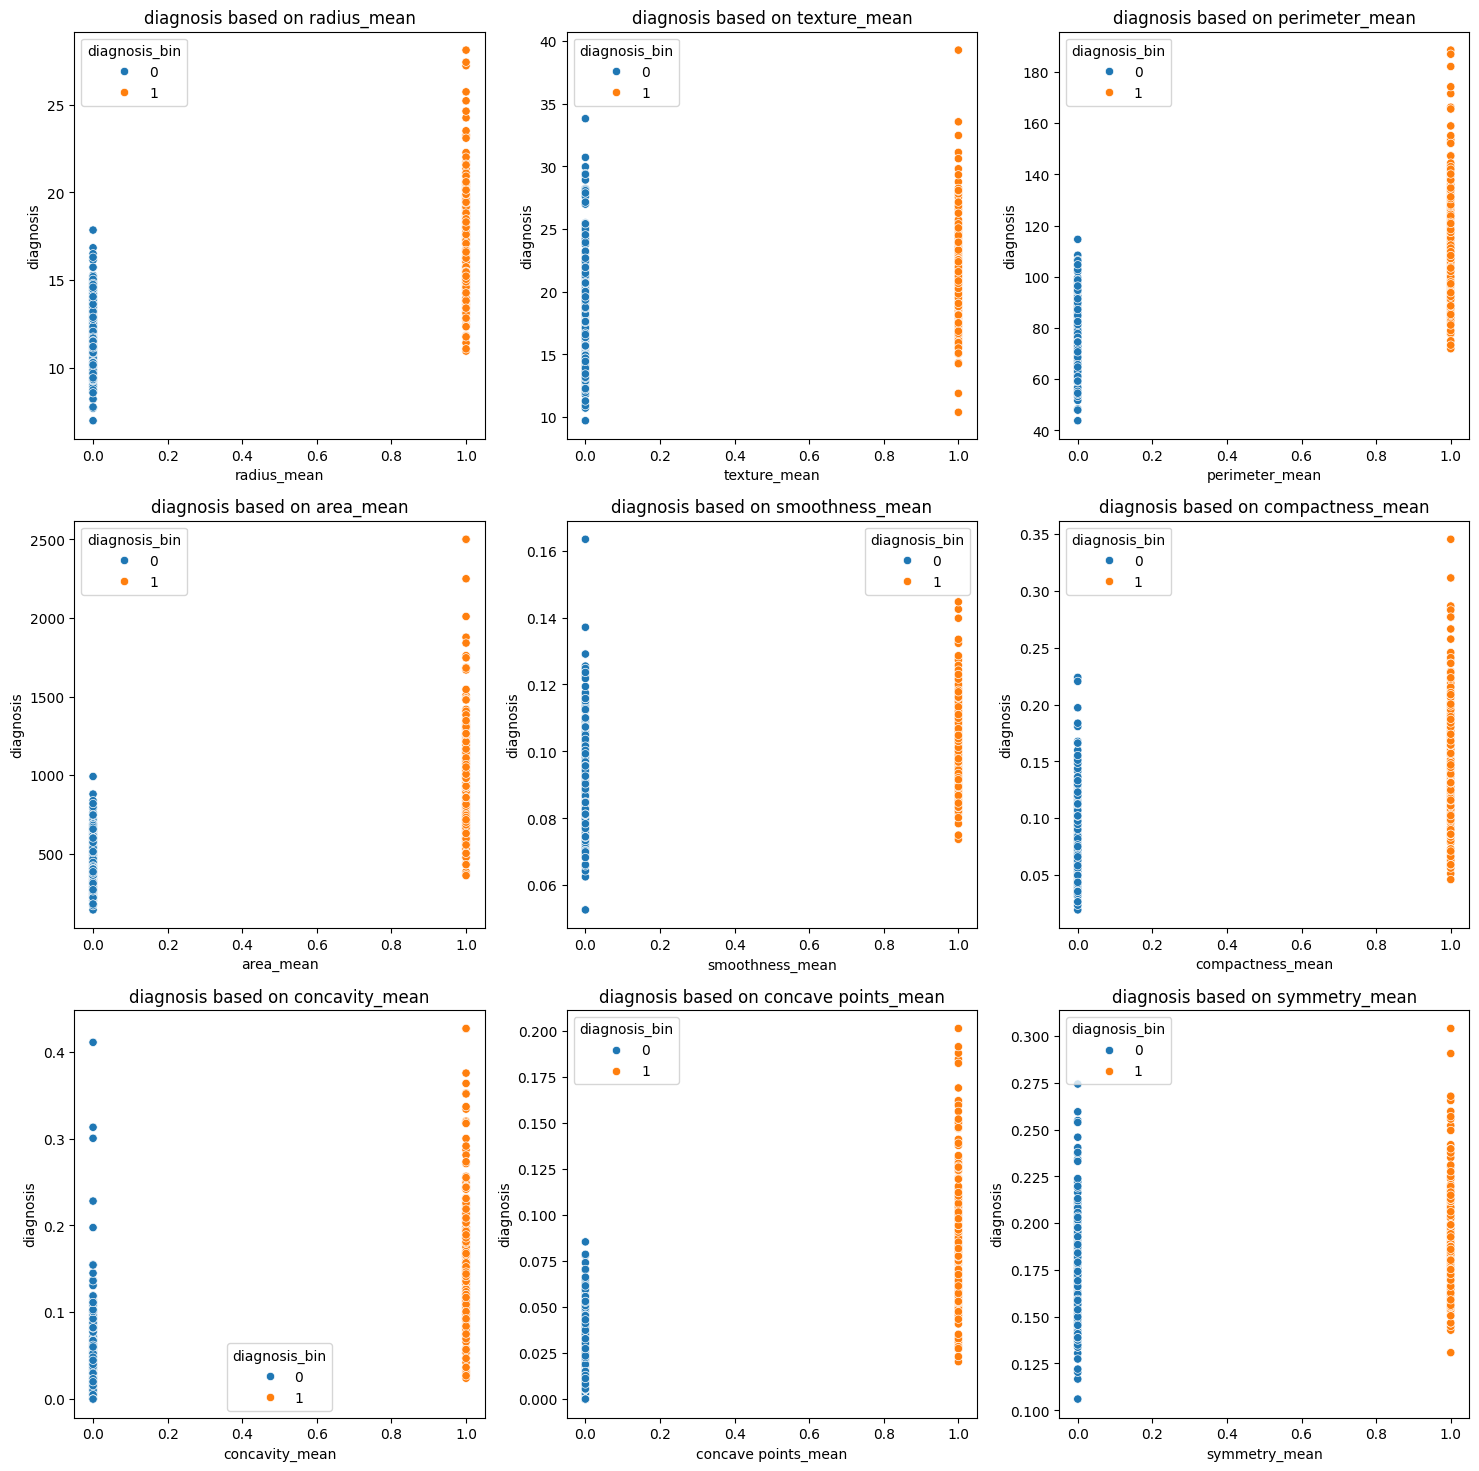

In [ ]:
#Resize the plot, and add custom axis labels and title
plt.figure(figsize = (18,18))

plt.subplot(3,3,1)
sns.scatterplot(x="diagnosis_bin", y="radius_mean", hue = "diagnosis_bin", data = mean_df) #creates a scatter plot, assigning x and y
plt.xlabel('radius_mean') #labels x-axis
plt.ylabel('diagnosis') #labels y-axis
plt.title('diagnosis based on radius_mean') #changed title

plt.subplot(3,3,2)
sns.scatterplot(x="diagnosis_bin", y="texture_mean", hue = "diagnosis_bin", data = mean_df) #creates a scatter plot, assigning x and y
plt.xlabel('texture_mean') #labels x-axis
plt.ylabel('diagnosis') #labels y-axis
plt.title('diagnosis based on texture_mean') #changed title

plt.subplot(3,3,3)
sns.scatterplot(x="diagnosis_bin", y="perimeter_mean", hue = "diagnosis_bin", data = mean_df) #creates a scatter plot, assigning x and y
plt.xlabel('perimeter_mean') #labels x-axis
plt.ylabel('diagnosis') #labels y-axis
plt.title('diagnosis based on perimeter_mean') #changed title

plt.subplot(3,3,4)
sns.scatterplot(x="diagnosis_bin", y="area_mean", hue = "diagnosis_bin", data = mean_df) #creates a scatter plot, assigning x and y
plt.xlabel('area_mean') #labels x-axis
plt.ylabel('diagnosis') #labels y-axis
plt.title('diagnosis based on area_mean') #changed title

plt.subplot(3,3,5)
sns.scatterplot(x="diagnosis_bin", y="smoothness_mean", hue = "diagnosis_bin", data = mean_df) #creates a scatter plot, assigning x and y
plt.xlabel('smoothness_mean') #labels x-axis
plt.ylabel('diagnosis') #labels y-axis
plt.title('diagnosis based on smoothness_mean') #changed title

plt.subplot(3,3,6)
sns.scatterplot(x="diagnosis_bin", y="compactness_mean", hue = "diagnosis_bin", data = mean_df) #creates a scatter plot, assigning x and y
plt.xlabel('compactness_mean') #labels x-axis
plt.ylabel('diagnosis') #labels y-axis
plt.title('diagnosis based on compactness_mean') #changed title

plt.subplot(3,3,7)
sns.scatterplot(x="diagnosis_bin", y="concavity_mean", hue = "diagnosis_bin", data = mean_df) #creates a scatter plot, assigning x and y
plt.xlabel('concavity_mean') #labels x-axis
plt.ylabel('diagnosis') #labels y-axis
plt.title('diagnosis based on concavity_mean') #changed title

plt.subplot(3,3,8)
sns.scatterplot(x="diagnosis_bin", y="concave points_mean", hue = "diagnosis_bin", data = mean_df) #creates a scatter plot, assigning x and y
plt.xlabel('concave points_mean') #labels x-axis
plt.ylabel('diagnosis') #labels y-axis
plt.title('diagnosis based on concave points_mean') #changed title

plt.subplot(3,3,9)
sns.scatterplot(x="diagnosis_bin", y="symmetry_mean", hue = "diagnosis_bin", data = mean_df) #creates a scatter plot, assigning x and y
plt.xlabel('symmetry_mean') #labels x-axis
plt.ylabel('diagnosis') #labels y-axis
plt.title('diagnosis based on symmetry_mean') #changed title


plt.show() #shows results of plot

Looking at the scatter plots, it seems like most of the higher-end outliers correlate to positive diagnosis for a malignant tumor (like most of the other higher values), so leaving in those outliers shouldn't negatively affect the model's ability to predict whether a tumor is malignant or not very much. While there are a few exceptions to this (such as the concavity_mean and smoothness_mean, where a couple non-malignant diagonoses have higher outlier values), the majority of the outliers are representative of extreme values that are almost always associated with malignant tumors, so I believe it is best to leave these outliers for now. Leaving the outliers in would create a slight chance of a couple negative cases being mis-diagnosed as positives, but removing the outliers may increase the liklihood of false negatives, which in this instance would be much more detrimental.

After looking at the correlation heatmap we will determine whether to keep these variables in the model, at which point we can determine if we want to remove the outliers for the benign tumors group.

A number of the variables look like they aren't normally distributed, so lets do some normality tests

In [ ]:


jb_stats = jarque_bera(np.log(mean_df["radius_mean"]))
norm_stats = normaltest(np.log(mean_df["radius_mean"]))

print("radius mean statistics")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(np.log(mean_df["texture_mean"]))
norm_stats = normaltest(np.log(mean_df["texture_mean"]))

print("texture_mean statistics")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(np.log(mean_df["perimeter_mean"]))
norm_stats = normaltest(np.log(mean_df["perimeter_mean"]))

print("perimeter_mean statistics")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(np.log(mean_df["area_mean"]))
norm_stats = normaltest(np.log(mean_df["area_mean"]))

print("area_mean statistics")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(np.log(mean_df["smoothness_mean"]))
norm_stats = normaltest(np.log(mean_df["smoothness_mean"]))

print("smoothness_mean statistics")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(np.log(mean_df["compactness_mean"]))
norm_stats = normaltest(np.log(mean_df["compactness_mean"]))

print("compactness_mean statistics")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(np.log(mean_df["concavity_mean"]))
norm_stats = normaltest(np.log(mean_df["concavity_mean"]))

print("concavity_mean statistics")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(np.log(mean_df["concave points_mean"]))
norm_stats = normaltest(np.log(mean_df["concave points_mean"]))

print("concave points_mean statistics")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(np.log(mean_df["symmetry_mean"]))
norm_stats = normaltest(np.log(mean_df["symmetry_mean"]))

print("symmetry_mean statistics")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


#The p-values are 0 or extremely close to 0, which indicates that the distribution of the log-transformed variables is statistically different from the normal distribution
#a tiny p-value and a large chi-square value from this test means that you can reject the null hypothesis that the data is normally distributed.

radius mean statistics
Jarque-Bera test statistics is 9.197884413758828 and p value is 0.010062474132948538
Normality test statistics is 8.935814480937367 and p value is 0.01147129741493105
texture_mean statistics
Jarque-Bera test statistics is 0.1471002493445693 and p value is 0.9290895743139035
Normality test statistics is 0.07128125839312796 and p value is 0.9649870193382618
perimeter_mean statistics
Jarque-Bera test statistics is 10.128849133438925 and p value is 0.006317545182810781
Normality test statistics is 9.810348215225655 and p value is 0.00740815315476355
area_mean statistics
Jarque-Bera test statistics is 8.011590850760065 and p value is 0.01820979896020748
Normality test statistics is 7.811354623734911 and p value is 0.020127317402592073
smoothness_mean statistics
Jarque-Bera test statistics is 3.7905952262175666 and p value is 0.15027360499585485
Normality test statistics is 3.4532951158353242 and p value is 0.17787974303864726
compactness_mean statistics
Jarque-Bera te

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:2154: RuntimeWarning: invalid value encountered in subtract
  diffx = x - mu
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1070: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


Most of the features do not have normal distributions. The only one that has a close to normal distribution is texture_mean.

We can use box-cox transformation to make the other features normal.

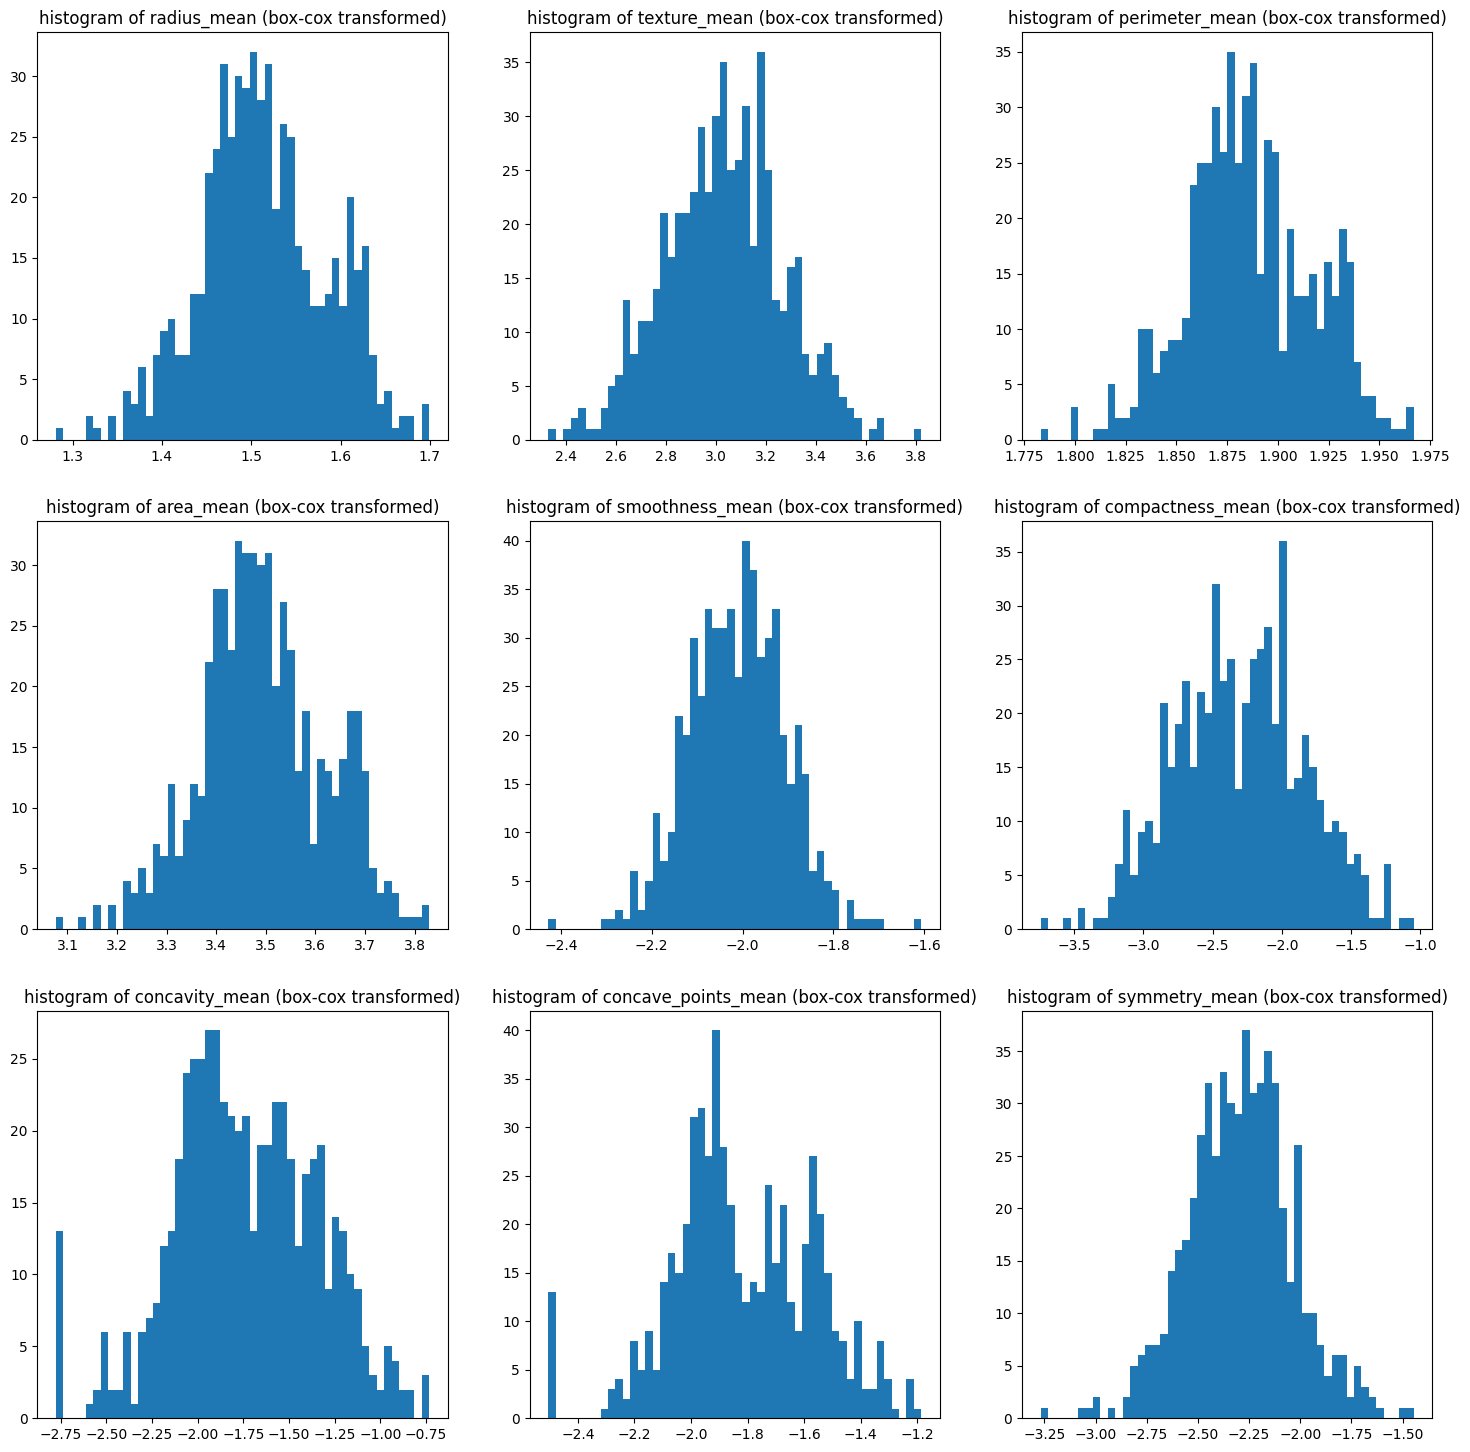

In [ ]:
from scipy.stats import boxcox

# Save the transformed array, then the lambda as variable name and _ respectively
radius_mean_boxcox,_ = boxcox(mean_df["radius_mean"])
texture_mean_boxcox,_ = boxcox(mean_df["texture_mean"])
perimeter_mean_boxcox,_ = boxcox(mean_df["perimeter_mean"])
area_mean_boxcox,_ = boxcox(mean_df["area_mean"])
smoothness_mean_boxcox,_ = boxcox(mean_df["smoothness_mean"])
compactness_mean_boxcox,_ = boxcox(mean_df["compactness_mean"])
concavity_mean_boxcox,_ = boxcox(mean_df["concavity_mean"] + 0.000001) # add a tiny value here because box-cox transformation will not work if the smallest value is 0 or negative
concave_points_mean_boxcox,_ = boxcox(mean_df["concave points_mean"] + 0.000001) # add a tiny value here because box-cox transformation will not work if the smallest value is 0 or negative
symmetry_mean_boxcox,_ = boxcox(mean_df["symmetry_mean"])

plt.figure(figsize=(18,18))

# Histograms of the Box-Cox-transformed data
plt.subplot(3, 3, 1)
plt.hist(radius_mean_boxcox, bins = 50)
plt.title("histogram of radius_mean (box-cox transformed)")

plt.subplot(3, 3, 2)
plt.hist(texture_mean_boxcox, bins = 50)
plt.title("histogram of texture_mean (box-cox transformed)")

plt.subplot(3, 3, 3)
plt.hist(perimeter_mean_boxcox, bins = 50)
plt.title("histogram of perimeter_mean (box-cox transformed)")

plt.subplot(3, 3, 4)
plt.hist(area_mean_boxcox, bins = 50)
plt.title("histogram of area_mean (box-cox transformed)")

plt.subplot(3, 3, 5)
plt.hist(smoothness_mean_boxcox, bins = 50)
plt.title("histogram of smoothness_mean (box-cox transformed)")

plt.subplot(3, 3, 6)
plt.hist(compactness_mean_boxcox, bins = 50)
plt.title("histogram of compactness_mean (box-cox transformed)")

plt.subplot(3, 3, 7)
plt.hist(concavity_mean_boxcox, bins = 50)
plt.title("histogram of concavity_mean (box-cox transformed)")

plt.subplot(3, 3, 8)
plt.hist(concave_points_mean_boxcox, bins = 50)
plt.title("histogram of concave_points_mean (box-cox transformed)")

plt.subplot(3, 3, 9)
plt.hist(symmetry_mean_boxcox, bins = 50)
plt.title("histogram of symmetry_mean (box-cox transformed)")

plt.show()

These graphs look more normally distributed, but lets check by repeating the Jarque Bera and Normality tests

In [ ]:
jb_stats = jarque_bera(np.log(radius_mean_boxcox))
norm_stats = normaltest(np.log(radius_mean_boxcox))

print("radius mean boxcox statistics")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(np.log(texture_mean_boxcox))
norm_stats = normaltest(np.log(texture_mean_boxcox))

print("texture_mean boxcox statistics")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(np.log(perimeter_mean_boxcox))
norm_stats = normaltest(np.log(perimeter_mean_boxcox))

print("perimeter_mean boxcox statistics")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(np.log(area_mean_boxcox))
norm_stats = normaltest(np.log(area_mean_boxcox))

print("area_mean boxcox statistics")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(np.log(smoothness_mean_boxcox + 3)) # add 3 to make values not negative, otherwise will evaluate as Nan
norm_stats = normaltest(np.log(smoothness_mean_boxcox + 3))

print("smoothness_mean boxcox statistics")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(np.log(compactness_mean_boxcox + 4))
norm_stats = normaltest(np.log(compactness_mean_boxcox + 4))

print("compactness_mean boxcox statistics")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(np.log(concavity_mean_boxcox + 3))
norm_stats = normaltest(np.log(concavity_mean_boxcox + 3))

print("concavity_mean boxcox statistics")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(np.log(concave_points_mean_boxcox + 2.7))
norm_stats = normaltest(np.log(concave_points_mean_boxcox + 2.7))

print("concave points_mean boxcox statistics")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


jb_stats = jarque_bera(np.log(symmetry_mean_boxcox + 3.5))
norm_stats = normaltest(np.log(symmetry_mean_boxcox + 3.5))

print("symmetry_mean boxcox statistics")
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

radius mean boxcox statistics
Jarque-Bera test statistics is 1.566415957807621 and p value is 0.4569378107289339
Normality test statistics is 1.6035515640406832 and p value is 0.448531761859733
texture_mean boxcox statistics
Jarque-Bera test statistics is 4.872702260333787 and p value is 0.08747947101062342
Normality test statistics is 4.908068134239691 and p value is 0.08594617359404996
perimeter_mean boxcox statistics
Jarque-Bera test statistics is 0.3389604707919983 and p value is 0.8441034376856751
Normality test statistics is 0.2517835660863173 and p value is 0.8817102576216833
area_mean boxcox statistics
Jarque-Bera test statistics is 0.9407672278699462 and p value is 0.6247625546848757
Normality test statistics is 0.9567975862906126 and p value is 0.6197749856762632
smoothness_mean boxcox statistics
Jarque-Bera test statistics is 34.43761931097285 and p value is 3.326334970661031e-08
Normality test statistics is 25.78118990859994 and p value is 2.5216554328989163e-06
compactness

Doing normality tests after box-cox transformation showed that the radius, perimeter, and area were more normal, but the rest of the variables were not.

Since the box-cox transformation made the size measurements more normally distributed, let's add these into the dataframe and check how it affects the correlation matrix.

In [ ]:
mean_df['radius_mean_boxcox'] = radius_mean_boxcox
mean_df['perimeter_mean_boxcox'] = perimeter_mean_boxcox
mean_df['area_mean_boxcox'] = area_mean_boxcox

mean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   radius_mean            569 non-null    float64
 1   texture_mean           569 non-null    float64
 2   perimeter_mean         569 non-null    float64
 3   area_mean              569 non-null    float64
 4   smoothness_mean        569 non-null    float64
 5   compactness_mean       569 non-null    float64
 6   concavity_mean         569 non-null    float64
 7   concave points_mean    569 non-null    float64
 8   symmetry_mean          569 non-null    float64
 9   diagnosis_bin          569 non-null    uint8  
 10  radius_mean_boxcox     569 non-null    float64
 11  perimeter_mean_boxcox  569 non-null    float64
 12  area_mean_boxcox       569 non-null    float64
dtypes: float64(12), uint8(1)
memory usage: 54.0 KB


<ipython-input-23-b5f1b2363ee2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_df['radius_mean_boxcox'] = radius_mean_boxcox
<ipython-input-23-b5f1b2363ee2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_df['perimeter_mean_boxcox'] = perimeter_mean_boxcox
<ipython-input-23-b5f1b2363ee2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

Lets make a correlation matrix for just the mean features and the box-cox transformed features

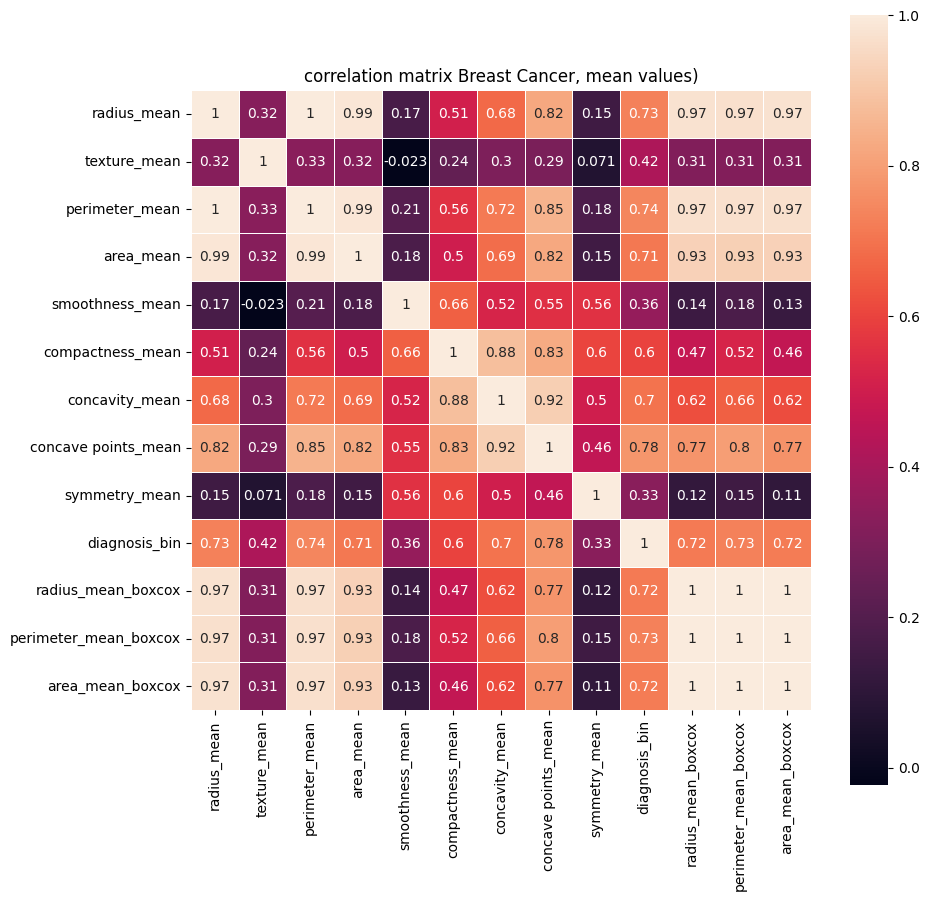

In [ ]:
# Make the correlation matrices
corrmat_mean = mean_df.corr()

#resize the figure
plt.figure(figsize=(10,10))

#draw a heatmap for the data
sns.heatmap(corrmat_mean, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix Breast Cancer, mean values)")


plt.show()


The box-cox transformed variables for area_mean, perimeter_mean, and radius_mean have approximately the same correlation to the target as the original data, but they are all correlated to each other 100%. For now we will try a model with the original data and if that model does not perform well, then for a second version of the model will see if using the box-cox transformed data makes any difference.

The mean area is highly correlated with the mean radius and mean perimeter (which makes sense, as they are all related measurements).
While perimeter is the most highly correlated feature out of these three, it is also highly correlated with concave points mean (85% correlation), which is the most highly correlated feature with the target diagnosis variable, so we will start with the mean area measurement (slightly less correlated with the concave points_mean) and drop the radius and perimeter measurements to begin.

The concavity mean and concave points mean are highly correlated with each other, so we will use the concave points mean and drop the concavity mean because concave points is more highly correlated with the target variable.

Smoothness_mean and texture_mean are not very highly correlated with the target but we will leave them in for now and can remove them when fine tuning if needed

fractal dimension mean is almost 0 correlation with the target so we will also drop that.



# Model 1: SVC

Target: diagnosis_bin

Features:
*   area_mean
*   concave points_mean
*   texture_mean
*   smoothness_mean
*   compactness_mean
*   symmetry_mean

.

Model Type: Linear SVC

This model type would be a good starting point because it is less influenced by outliers and works well for data with many dimensions (many features). While we don't have a lot of features, this model might be a good start for a model using the whole set of mean features.



In [ ]:
# make a dataframe with features for the first model

# drop the box-cox transformed variables, the radius/perimeter variables, and the concavty_mean
mean_df_short1 = mean_df.drop(['radius_mean_boxcox', 'perimeter_mean_boxcox', 'area_mean_boxcox', 'radius_mean', 'perimeter_mean', 'concavity_mean'], axis = 1)


In [ ]:
mean_df_short1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   texture_mean         569 non-null    float64
 1   area_mean            569 non-null    float64
 2   smoothness_mean      569 non-null    float64
 3   compactness_mean     569 non-null    float64
 4   concave points_mean  569 non-null    float64
 5   symmetry_mean        569 non-null    float64
 6   diagnosis_bin        569 non-null    uint8  
dtypes: float64(6), uint8(1)
memory usage: 27.4 KB


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


Start by using SVC with the deafult rbf kernel

In [ ]:
#set features and target
X = mean_df_short1[['area_mean', 'concave points_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean']]
y = mean_df_short1['diagnosis_bin']

#split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .8)

#make an instance of the model
#start with rbf default kernel
svm = SVC(kernel = 'rbf', probability=True)

#train the model on data
svm.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
svm_score = svm.score(X_test, y_test)
svm_predictions = svm.predict(X_test)

print('Accuracy of SVM: {:.3f}'.format(svm_score))

Accuracy of SVM: 0.877


This kernel performed ok, let's see if one of the others is better

In [ ]:
#set features and target
X = mean_df_short1[['area_mean', 'concave points_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean']]
y = mean_df_short1['diagnosis_bin']

#split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .8)

#make an instance of the model
#try a sigmoid kernel
svm = SVC(kernel = 'sigmoid', probability=True)

#train the model on data
svm.fit(X_train, y_train)

SVC(kernel='sigmoid', probability=True)

In [ ]:
svm_score = svm.score(X_test, y_test)
svm_predictions = svm.predict(X_test)

print('Accuracy of SVM: {:.3f}'.format(svm_score))

Accuracy of SVM: 0.456


In [ ]:
#set features and target
X = mean_df_short1[['area_mean', 'concave points_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean']]
y = mean_df_short1['diagnosis_bin']

#split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .8)

#make an instance of the model
#try a polynomial kernel
svm = SVC(kernel = 'poly', probability=True)

#train the model on data
svm.fit(X_train, y_train)

SVC(kernel='poly', probability=True)

In [ ]:
svm_score = svm.score(X_test, y_test)
svm_predictions = svm.predict(X_test)

print('Accuracy of SVM: {:.3f}'.format(svm_score))

Accuracy of SVM: 0.886


In [ ]:
#set features and target
X = mean_df_short1[['area_mean', 'concave points_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean']]
y = mean_df_short1['diagnosis_bin']

#split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = .8)

#make an instance of the model
#start with a linear kernel, then we can try other kernels to see if they perform better
svm = SVC(kernel = 'linear', probability=True)

#train the model on data
svm.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

In [ ]:
svm_score = svm.score(X_test, y_test)
svm_predictions = svm.predict(X_test)

print('Accuracy of SVM: {:.3f}'.format(svm_score))

Accuracy of SVM: 0.921


The linear kernel seemed to be the one that performed best for this model.

In [ ]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, fbeta_score, classification_report
from sklearn import ensemble

In [ ]:
# define function to plot a confusion matrix

def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization


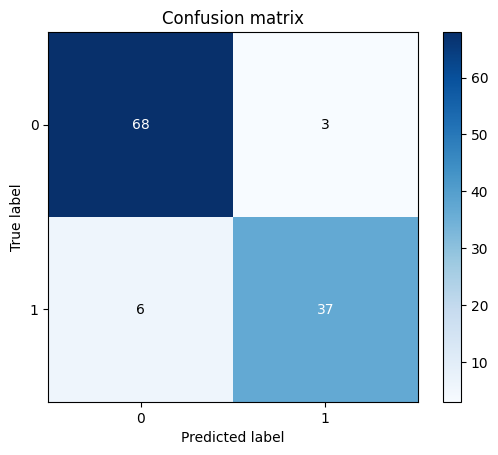

In [ ]:
#confusion matrix without normalization

cm = confusion_matrix(y_test, svm_predictions)
plot_confusion_matrix(cm,[0,1],False)



Normalized confusion matrix


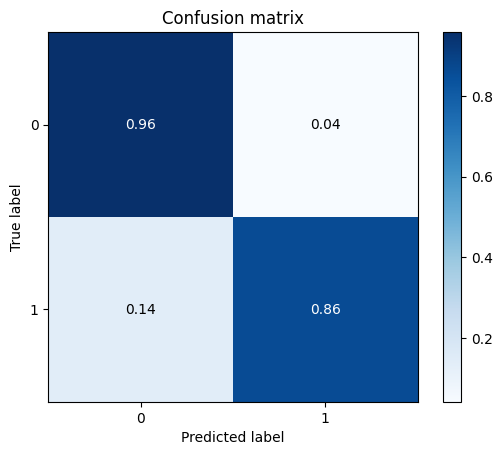

In [ ]:
#confusion matrix with normalization

cm = confusion_matrix(y_test, svm_predictions)
plot_confusion_matrix(cm,[0,1],True)


In [ ]:
# calculate AUC for this model

from sklearn.metrics import roc_auc_score

probs = svm.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, probs)

print('The AUC score is: ', auc)


The AUC score is:  0.9849328529315428


Let's try dropping the feature that is least correlated with the target (symmetry)

In [ ]:
#set features and target
X = mean_df_short1[['area_mean', 'concave points_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean']]
y = mean_df_short1['diagnosis_bin']

#split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = .8)

#make an instance of the model
#start with a linear kernel, then we can try other kernels to see if they perform better
svm = SVC(kernel = 'linear', probability=True)

#train the model on data
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

Normalized confusion matrix


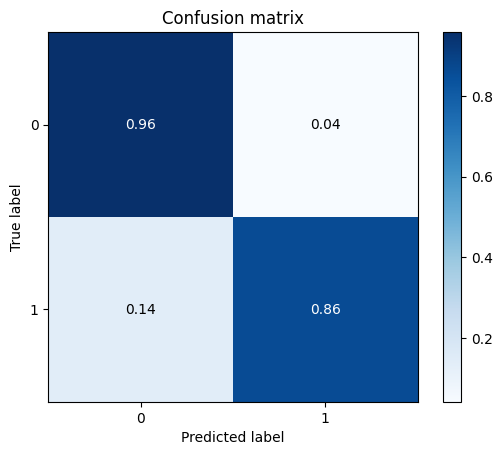

In [ ]:
#confusion matrix with normalization

cm = confusion_matrix(y_test, svm_predictions)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
# calculate AUC for this model
probs = svm.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probs)

print('The AUC score is: ', auc)

The AUC score is:  0.982640026203734


Let's try dropping another low correlation feature

In [ ]:
#set features and target
X = mean_df_short1[['area_mean', 'concave points_mean']]
y = mean_df_short1['diagnosis_bin']

#split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = .8)

#make an instance of the model
#start with a linear kernel, then we can try other kernels to see if they perform better
svm = SVC(kernel = 'linear', probability=True)

#train the model on data
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

Normalized confusion matrix


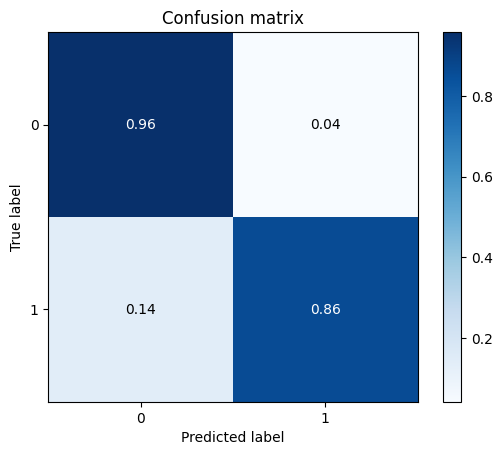

In [ ]:
#confusion matrix with normalization

cm = confusion_matrix(y_test, svm_predictions)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
# calculate AUC for this model

from sklearn.metrics import roc_auc_score

probs = svm.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, probs)

print('The AUC score is: ', auc)

The AUC score is:  0.9829675728791354


The performance of the model didn't change much if at all when the features were changed

This model performs well for correctly diagnosing benign tumors, but not as well for correctly diagnosing malignant tumors, and for this data we want to prioritize having as few false negatives as possible. The AUC for this model is very good, indicating that this is much better than a random classifier.

.  


This model type works best when there is a clear separation between the classes, and when revisiting the scatter plots for each variable, it looks like there is a fair bit of overlap between the benign and malignant data for many of the variables, so this model type may not be the best.For the next model I will look at a random forest classifier.

# Model 2: Random Forest Classifier

Target: diagnosis_bin
Featues:
*   texture_mean
*   area_mean
*   smoothness_mean
*   compactness_mean
*   concave points_mean
*   symmetry_mean

.

Model type: Random Forest

This model type has a lower risk of overfitting and shows which features are important to the prediction. Even though this model is less prone to overfitting, we will still use cross validation to avoid potentially overfitting the training data and provide a more reliable estimate of the model's performance on unseen data

In [ ]:
from sklearn import ensemble
import time


In [ ]:
mean_df_short2 = mean_df_short1

mean_df_short2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   texture_mean         569 non-null    float64
 1   area_mean            569 non-null    float64
 2   smoothness_mean      569 non-null    float64
 3   compactness_mean     569 non-null    float64
 4   concave points_mean  569 non-null    float64
 5   symmetry_mean        569 non-null    float64
 6   diagnosis_bin        569 non-null    uint8  
dtypes: float64(6), uint8(1)
memory usage: 27.4 KB


In [ ]:
### VERSION 1 ###

start = time.time()

#random forest model with 10 trees, max depth of 4
rfc1 = ensemble.RandomForestClassifier(n_estimators=10, max_depth = 4)

#set X and Y
X = mean_df_short2.drop('diagnosis_bin', axis = 1)
Y = mean_df_short2['diagnosis_bin']

#split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = .8)

#fit random forest classifier
rfc1.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, n_estimators=10)

In [ ]:
y_pred1 = rfc1.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
scores = cross_val_score(rfc1, X, y, cv=5)
# Calculate the average performance across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

Mean Accuracy: 0.9297314081664337
Cross-validation time elapsed: 2.39 seconds.


The high accuracy score from cross validation is promising and indicates that we are not overfitting the training data

Normalized confusion matrix


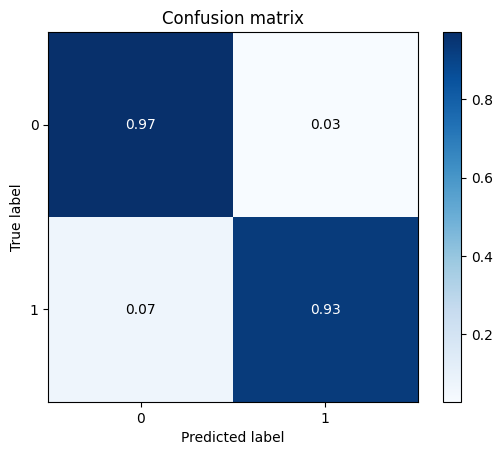

In [ ]:
#confusion matrix with normalization

cm = confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
# calculate AUC for this model

from sklearn.metrics import roc_auc_score

probs = rfc1.predict_proba(X_test)[:, 1]

auc1 = roc_auc_score(y_test, probs)

print('The AUC score is: ', auc1)

The AUC score is:  0.9914837864395676


this is a pretty good model to start with. Let's start by tuning the max depth to see what would work best.

Try changing the max depth to 3

In [ ]:
### VERSION 2 ###

#change max depth from 4 to 3
rfc2 = ensemble.RandomForestClassifier(n_estimators=10, max_depth = 3)

#set X and Y
X = mean_df_short2.drop('diagnosis_bin', axis = 1)
Y = mean_df_short2['diagnosis_bin']

#split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = .8)

#fit random forest classifier
rfc2.fit(X_train, y_train)

# make predictions
y_pred2 = rfc2.predict(X_test)

In [ ]:

# Perform cross-validation
scores = cross_val_score(rfc2, X, y, cv=5)
# Calculate the average performance across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

Mean Accuracy: 0.9367489520260829
Cross-validation time elapsed: 72.23 seconds.


Normalized confusion matrix


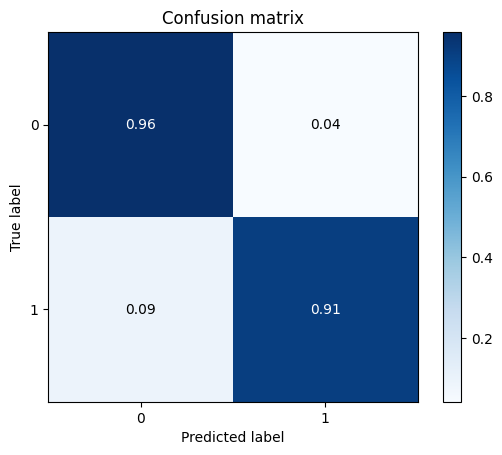

In [ ]:
#confusion matrix with normalization

cm = confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
# calculate AUC for this model

probs2 = rfc2.predict_proba(X_test)[:, 1]

auc2 = roc_auc_score(y_test, probs2)
print('The AUC score is: ', auc)

The AUC score is:  0.9842777595807403


The AUC for this model is slightly lower than the previous version, and the prediction score for the malignant tumors was not as good.


Try changing the max depth to 5

In [ ]:
### VERSION 3 ###

#change max depth to 5
rfc3 = ensemble.RandomForestClassifier(n_estimators=10, max_depth = 5)

#set X and Y
X = mean_df_short2.drop('diagnosis_bin', axis = 1)
Y = mean_df_short2['diagnosis_bin']

#split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = .8)

#fit random forest classifier
rfc3.fit(X_train, y_train)

# make predictions
y_pred3 = rfc3.predict(X_test)

In [ ]:

# Perform cross-validation
scores = cross_val_score(rfc3, X, y, cv=5)
# Calculate the average performance across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

Mean Accuracy: 0.929762459245459
Cross-validation time elapsed: 216.08 seconds.


Normalized confusion matrix


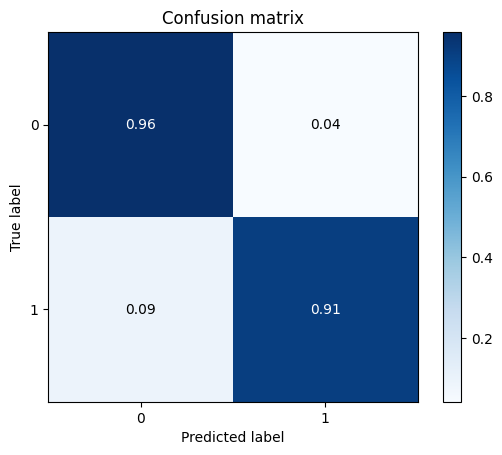

In [ ]:
#confusion matrix with normalization

cm = confusion_matrix(y_test, y_pred3)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
# calculate AUC for this model

probs3 = rfc3.predict_proba(X_test)[:, 1]

auc3 = roc_auc_score(y_test, probs3)
print('The AUC score is: ', auc)

The AUC score is:  0.9842777595807403



Looking at the confusion matrixes for the three versions above, the one with max depth of 4 performed better for reducing false negatives and also had the highest AUC, so we will stick with max depth of 4.

Let's try tuning the number of trees to see if that makes much difference.

In [ ]:
### VERSION 4 ###

#keep max depth at 4 and change # of trees to 15
rfc4 = ensemble.RandomForestClassifier(n_estimators=15, max_depth = 4)

#set X and Y
X = mean_df_short2.drop('diagnosis_bin', axis = 1)
Y = mean_df_short2['diagnosis_bin']

#split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = .8)

#fit random forest classifier
rfc4.fit(X_train, y_train)

# make predictions
y_pred4 = rfc4.predict(X_test)

In [ ]:

# Perform cross-validation
scores = cross_val_score(rfc4, X, y, cv=5)
# Calculate the average performance across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

Mean Accuracy: 0.934979040521658
Cross-validation time elapsed: 304.95 seconds.


Normalized confusion matrix


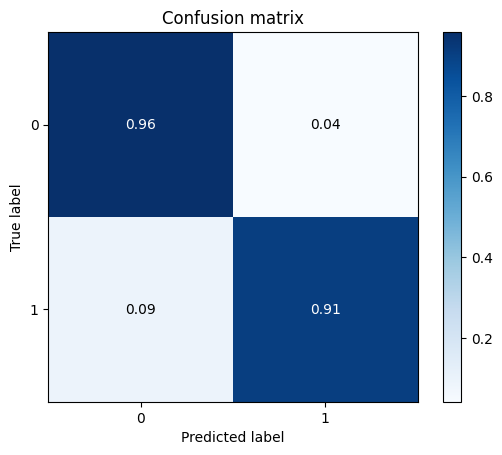

In [ ]:
#confusion matrix with normalization

cm = confusion_matrix(y_test, y_pred4)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
# calculate AUC for this model

probs4 = rfc4.predict_proba(X_test)[:, 1]

auc4 = roc_auc_score(y_test, probs4)
print('The AUC score is: ', auc)

The AUC score is:  0.9862430396331477


This did well, but not as well as the first version of the model for the confusion matrix, and slightly lower for the AUC

Try increasing # of trees to 20

In [ ]:
### VERSION 5 ###

#keep max depth at 4 and change # of trees to 20
rfc5 = ensemble.RandomForestClassifier(n_estimators=20, max_depth = 4)

#set X and Y
X = mean_df_short2.drop('diagnosis_bin', axis = 1)
Y = mean_df_short2['diagnosis_bin']

#split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = .8)

#fit random forest classifier
rfc5.fit(X_train, y_train)

# make predictions
y_pred5 = rfc5.predict(X_test)

In [ ]:

# Perform cross-validation
scores = cross_val_score(rfc5, X, y, cv=5)
# Calculate the average performance across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

Mean Accuracy: 0.9262226362366093
Cross-validation time elapsed: 387.64 seconds.


Normalized confusion matrix


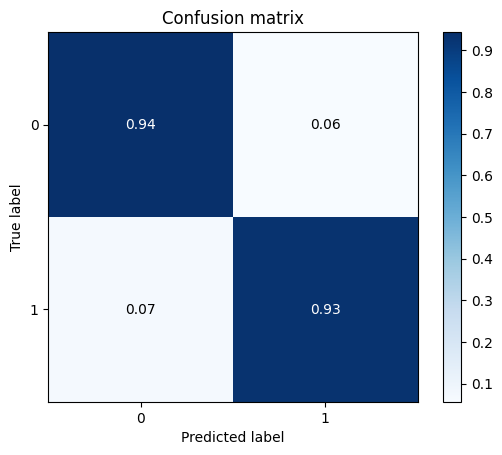

In [ ]:
#confusion matrix with normalization

cm = confusion_matrix(y_test, y_pred5)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
# calculate AUC for this model

probs5 = rfc5.predict_proba(X_test)[:, 1]

auc5 = roc_auc_score(y_test, probs5)
print('The AUC score is: ', auc)

The AUC score is:  0.9862430396331477


Looking at the confusion matrix and AUC scores for each of these versions of the model, it appears that the best hyperparamters for the model are 10 trees and a max depth of 4.

Now that we have the hyperparameters tuned, let's start paring down the variables to find how many of the set of variables we have chosen we need to make the best version of this model.

We will start by looking at importance of features for this version of the model

<Axes: >

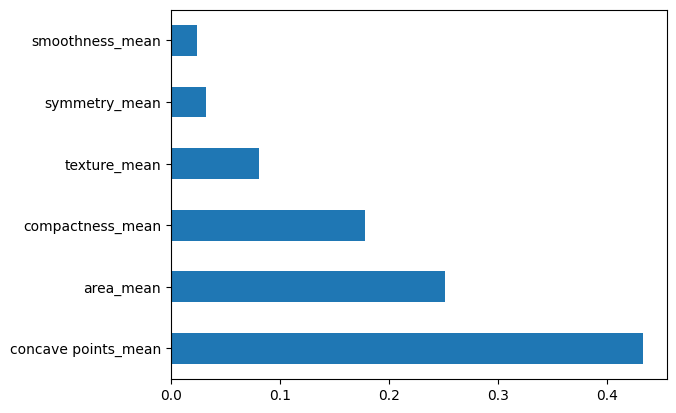

In [ ]:
#fit random forest classifier
rfc1.fit(X, Y)

#set the variable feat_importances as the feature importances calculated by scikitlearn during model building
feat_importances = pd.Series(rfc1.feature_importances_, index=X.columns)

#rank importance from low to high, and set plot as horizontal bar graph
feat_importances.nlargest(20).plot(kind='barh')

Let's start by dropping the two lowest importance variables and running the model again.

In [ ]:
### VERSION 6 ###

start = time.time()

#random forest model with 10 trees, max depth of 4
rfc6 = ensemble.RandomForestClassifier(n_estimators=10, max_depth = 4)

#set X and Y
X = mean_df_short2.drop(['diagnosis_bin', 'smoothness_mean', 'symmetry_mean'], axis = 1)
Y = mean_df_short2['diagnosis_bin']

#split data into training and test sets (80% train, 20% test)
X_train6, X_test6, y_train6, y_test6 = train_test_split(X, y, random_state = 42, train_size = .8)

#fit random forest classifier
rfc6.fit(X_train6, y_train6)

y_pred6 = rfc6.predict(X_test6)


In [ ]:

# Perform cross-validation
scores = cross_val_score(rfc6, X, y, cv=5)
# Calculate the average performance across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

Mean Accuracy: 0.934979040521658
Cross-validation time elapsed: 1.61 seconds.


Normalized confusion matrix


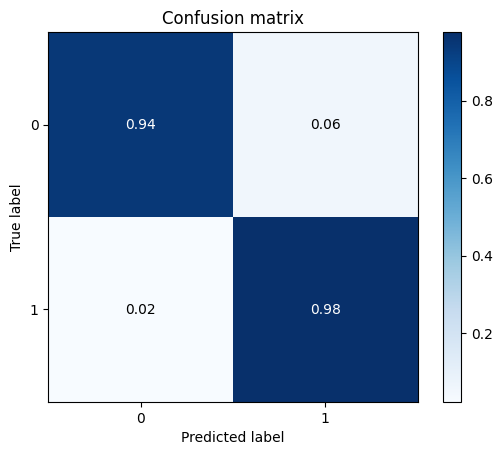

In [ ]:
#confusion matrix with normalization

cm = confusion_matrix(y_test6, y_pred6)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
# calculate AUC for this model
probs6 = rfc6.predict_proba(X_test6)[:, 1]

auc6 = roc_auc_score(y_test6, probs6)

print('The AUC score is: ', auc6)

The AUC score is:  0.9934490664919751


Dropping the smoothness and symmetry measurements slightly decreased the true negatives score from the first version of the model (using all 6 features) but also has an increased true positives score, cross-validation score, and AUC score.

Let's try dropping texture_mean too.

In [ ]:
start = time.time()

#random forest model with 10 trees, max depth of 4
rfc7 = ensemble.RandomForestClassifier(n_estimators=10, max_depth = 4)

#set X and Y
X = mean_df_short2.drop(['diagnosis_bin', 'smoothness_mean', 'symmetry_mean', 'texture_mean'], axis = 1)
Y = mean_df_short2['diagnosis_bin']

#split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = .8)

#fit random forest classifier
rfc7.fit(X_train, y_train)

y_pred7 = rfc7.predict(X_test)

In [ ]:
# Perform cross-validation
scores = cross_val_score(rfc7, X, y, cv=5)
# Calculate the average performance across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

Mean Accuracy: 0.9138332557056359
Cross-validation time elapsed: 1.63 seconds.


Normalized confusion matrix


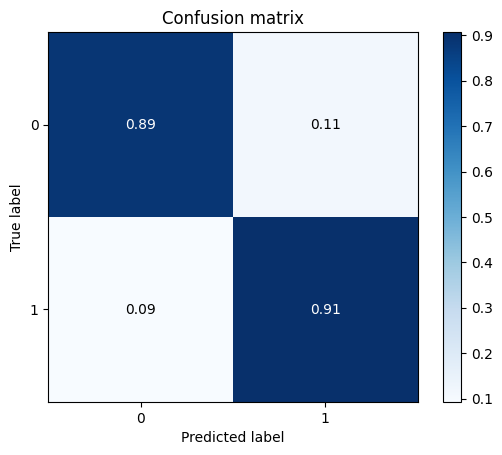

In [ ]:
#confusion matrix with normalization

cm = confusion_matrix(y_test, y_pred7)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
# calculate AUC for this model
probs7 = rfc7.predict_proba(X_test)[:, 1]

auc7 = roc_auc_score(y_test, probs7)

print('The AUC score is: ', auc7)

The AUC score is:  0.982640026203734


Let's check the importace for the features in this model again

<Axes: >

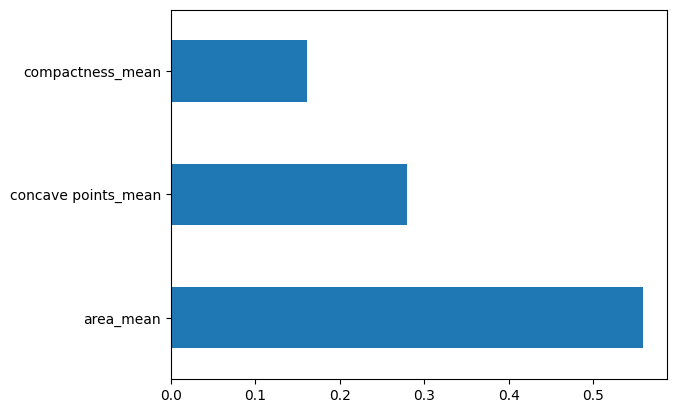

In [ ]:
#fit random forest classifier
rfc7.fit(X, Y)

#set the variable feat_importances as the feature importances calculated by scikitlearn during model building
feat_importances = pd.Series(rfc7.feature_importances_, index=X.columns)

#rank importance from low to high, and set plot as horizontal bar graph
feat_importances.nlargest(20).plot(kind='barh')

Concave_points and area were the most important features, so let's drop compactness

In [ ]:
start = time.time()

#random forest model with 10 trees, max depth of 4
rfc8 = ensemble.RandomForestClassifier(n_estimators=10, max_depth = 4)

#set X and Y
X = mean_df_short2.drop(['diagnosis_bin', 'smoothness_mean', 'symmetry_mean', 'texture_mean', 'compactness_mean'], axis = 1)
Y = mean_df_short2['diagnosis_bin']

#split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = .8)

#fit random forest classifier
rfc8.fit(X_train, y_train)

y_pred8 = rfc8.predict(X_test)

In [ ]:
# Perform cross-validation
scores = cross_val_score(rfc8, X, y, cv=5)
# Calculate the average performance across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

Mean Accuracy: 0.9121409718987733
Cross-validation time elapsed: 1.42 seconds.


Normalized confusion matrix


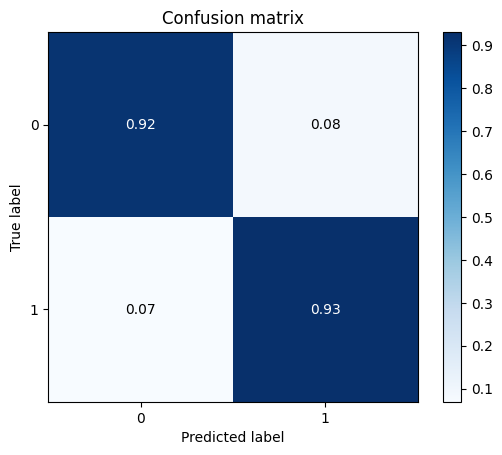

In [ ]:
#confusion matrix with normalization

cm = confusion_matrix(y_test, y_pred8)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
# calculate AUC for this model
probs8 = rfc8.predict_proba(X_test)[:, 1]

auc8 = roc_auc_score(y_test, probs8)

print('The AUC score is: ', auc8)

The AUC score is:  0.9793645594497216


<Axes: >

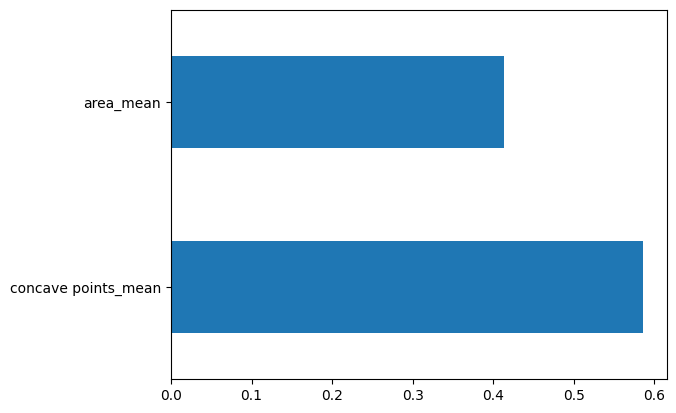

In [ ]:
#fit random forest classifier
rfc8.fit(X, Y)

#set the variable feat_importances as the feature importances calculated by scikitlearn during model building
feat_importances = pd.Series(rfc8.feature_importances_, index=X.columns)

#rank importance from low to high, and set plot as horizontal bar graph
feat_importances.nlargest(20).plot(kind='barh')

From earlier in data exploration, we noted that area and concave_points were somewhat highly correlated, so let's make a variable that represents the interaction between the two and add that in to see how that affects the model.

In [ ]:
mean_df_short2['area_concave_points'] = mean_df_short2['area_mean'] * mean_df_short2['concave points_mean']

mean_df_short2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   texture_mean         569 non-null    float64
 1   area_mean            569 non-null    float64
 2   smoothness_mean      569 non-null    float64
 3   compactness_mean     569 non-null    float64
 4   concave points_mean  569 non-null    float64
 5   symmetry_mean        569 non-null    float64
 6   diagnosis_bin        569 non-null    uint8  
 7   area_concave_points  569 non-null    float64
dtypes: float64(7), uint8(1)
memory usage: 31.8 KB


In [ ]:
start = time.time()

#random forest model with 10 trees, max depth of 4
rfc9 = ensemble.RandomForestClassifier(n_estimators=10, max_depth = 4)

#set X and Y
X = mean_df_short2.drop(['diagnosis_bin', 'smoothness_mean', 'symmetry_mean', 'texture_mean', 'compactness_mean'], axis = 1)
Y = mean_df_short2['diagnosis_bin']

#split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = .8)

#fit random forest classifier
rfc9.fit(X_train, y_train)

y_pred9 = rfc9.predict(X_test)

In [ ]:
# Perform cross-validation
scores = cross_val_score(rfc9, X, y, cv=5)
# Calculate the average performance across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

print(f'Cross-validation time elapsed: {round(time.time() - start, 2)} seconds.')

Mean Accuracy: 0.9262071106970968
Cross-validation time elapsed: 1.95 seconds.


Normalized confusion matrix


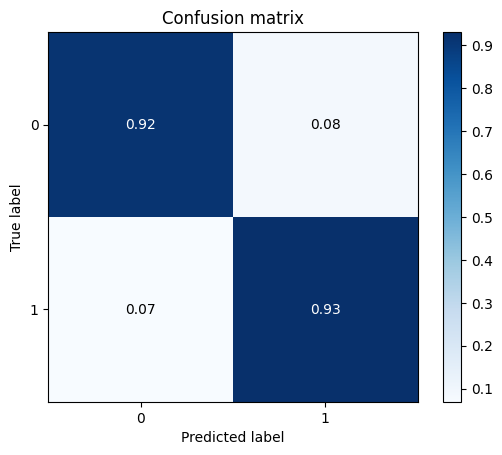

In [ ]:
#confusion matrix with normalization

cm = confusion_matrix(y_test, y_pred9)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
# calculate AUC for this model
probs9 = rfc9.predict_proba(X_test)[:, 1]

auc9 = roc_auc_score(y_test, probs9)

print('The AUC score is: ', auc9)

The AUC score is:  0.980019652800524


<Axes: >

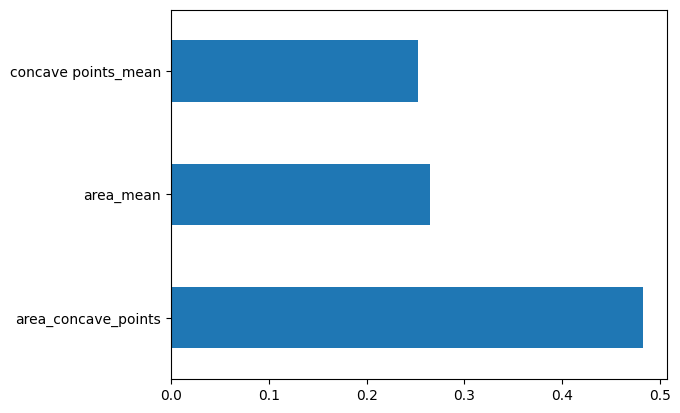

In [ ]:
#fit random forest classifier
rfc9.fit(X, Y)

#set the variable feat_importances as the feature importances calculated by scikitlearn during model building
feat_importances = pd.Series(rfc9.feature_importances_, index=X.columns)

#rank importance from low to high, and set plot as horizontal bar graph
feat_importances.nlargest(20).plot(kind='barh')

Looking at the confusion matrixes, cross validation, and AUC scores, it looks like the best set of features for the model was using the set with just area_mean, concave_points_mean, texture_mean, and compactness_mean. While looking at the confusion matrix this model showed a 2% decrease in true negatives, it had an overall higher cross validation accuracy score and a higher AUC score. Since we are more concerned with true positives and decreasing false negatives, the slight decrease in true negatives is less of an issue if it means we have a more accurate overall model.

Let's look at some other evaluation metrics to double check that the 6th version of the model also has good scores for precision and recall.

In [ ]:
#run the 6th model from above again to make sure we aren't using info saved from models after that

# Calculate accuracy score
print('The accuracy score is: ', rfc6.score(X_test6, y_test6))

#calculate precision score
y_pred6 = rfc6.predict(X_test6)
print('The precision score is: ', precision_score(y_test6,y_pred6))

# Calculate Recall score
print('The recall score is: ', recall_score(y_test6,y_pred6))

#calculate F-score
f1 = f1_score(y_test6, y_pred6)
fbeta_precision = fbeta_score(y_test6, y_pred6, beta=0.5)
fbeta_recall = fbeta_score(y_test6, y_pred6, beta=2)
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

The accuracy score is:  0.9649122807017544
The precision score is:  0.9534883720930233
The recall score is:  0.9534883720930233
F1 score: 0.95
Fbeta score favoring precision: 0.95
FBeta score favoring recall: 0.95


These scores all look very good! We are getting high accuracy scores, just like we were in the cross validation, and both the precision and recall scores are high. Since the precision and recall scores are both high, the F-score is also high.


Overall this is a very good model, and has great performance, but I want to try one more model type before determining that this one is the best.

# Model 3: Gradient Boosted Classifier

Target: diagnosis_bin

Features:

*   texture_mean
*   area_mean
*   smoothness_mean
*   compactness_mean
*   concave points_mean
*   symmetry_mean


Model Type: Gradient Boosted Classifier

While the random forest model trains each "tree" independently, the gradient boosted model learns from mistakes in previous "trees" and continuously tries to improve the model as it goes. This could be another good model type for this data, we would just need to be aware that this model type has a higher propensity for overfitting than the random forest model.

In [ ]:
mean_df_short3 = mean_df_short1
mean_df_short3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   texture_mean         569 non-null    float64
 1   area_mean            569 non-null    float64
 2   smoothness_mean      569 non-null    float64
 3   compactness_mean     569 non-null    float64
 4   concave points_mean  569 non-null    float64
 5   symmetry_mean        569 non-null    float64
 6   diagnosis_bin        569 non-null    uint8  
dtypes: float64(6), uint8(1)
memory usage: 27.4 KB


In [ ]:
from sklearn.model_selection import train_test_split

# set the target and predictors
y = mean_df_short3['diagnosis_bin']
X = mean_df_short3.loc[:, ~mean_df_short3.columns.isin(['diagnosis_bin'])]

#split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = .8)


In [ ]:
### VERSION 1 ###

# 500 iterations,  2-deep trees, and set loss function to log_loss (previously 'deviance')

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'log_loss'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Normalized confusion matrix


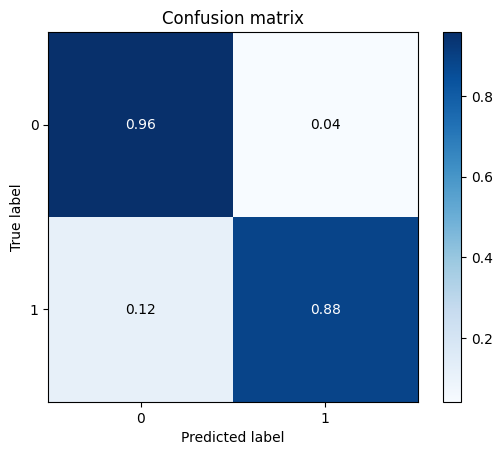

In [ ]:
# confusion matrix with normalization

cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
# calculate AUC for this model

probs = clf.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, probs)

print('The AUC score is: ', auc)

The AUC score is:  0.9757615460203078


In [ ]:
# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=5)
# Calculate the average performance across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.9402732494954199


Text(0.5, 1.0, 'Variable Importance')

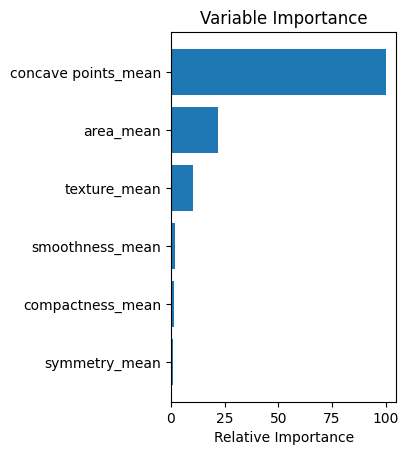

In [ ]:
# Get a measure of how important each of the features in the model was

feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')




It seems like the concave_points_mean is the most important feature for this model (which makes sense as it was the most highly correlated to the target variable). The next highest are area_mean and texture_mean, which were also highly correlated with the target variable. Compactness and smoothness are both fairly low, and symmetry seems to be almost 0.

Let's try changing the max depth to 3

In [ ]:
### VERSION 2 ###

# 500 iterations,  3-deep trees, and set loss function to log_loss (previously 'deviance')

params = {'n_estimators': 500,
          'max_depth': 3,
          'loss': 'log_loss'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Normalized confusion matrix


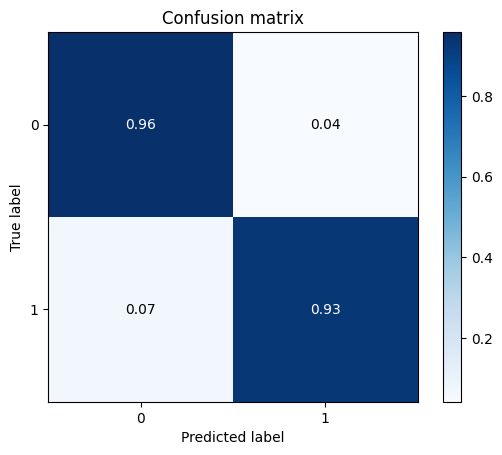

In [ ]:
# confusion matrix with normalization

cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=5)
# Calculate the average performance across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.9297003570874087


In [ ]:
# calculate AUC for this model

probs = clf.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, probs)

print('The AUC score is: ', auc)

The AUC score is:  0.9787094660989191


This version of the model had a higher AUC and a better confusion matrix score for true positives, but a slightly lower cross validation score.

Let's try increasing the max depth to 4

In [ ]:
### VERSION 3 ###

# 500 iterations,  4-deep trees, and set loss function to log_loss (previously 'deviance')

params = {'n_estimators': 500,
          'max_depth': 4,
          'loss': 'log_loss'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Normalized confusion matrix


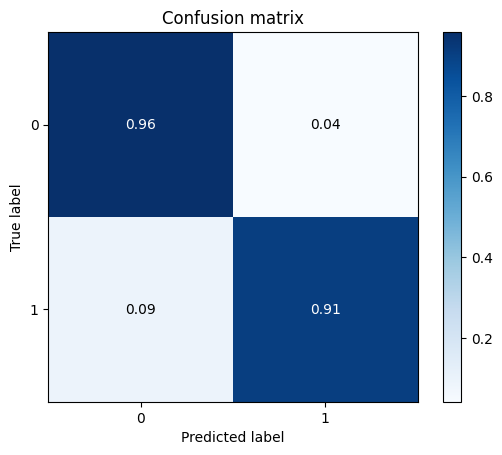

In [ ]:
# confusion matrix with normalization

cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=5)
# Calculate the average performance across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.9208973761838225


In [ ]:
# calculate AUC for this model

probs = clf.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, probs)

print('The AUC score is: ', auc)

The AUC score is:  0.9708483458892893


Using max depth of 4 slightly decreased the true positives and also slightly decreased the AUC and cross validation scores, so we will revert back to the max depth of 3

Next let's try varying the # of iterations to see if we can further improve the model.

Start by reducing the number of iterations to 300

In [ ]:
### VERSION 4 ###

# 300 iterations,  3-deep trees, and set loss function to log_loss (previously 'deviance')

params = {'n_estimators': 300,
          'max_depth': 3,
          'loss': 'log_loss'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Normalized confusion matrix


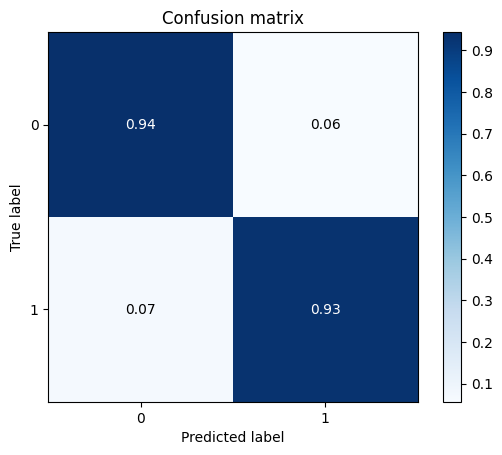

In [ ]:
# confusion matrix with normalization

cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=5)
# Calculate the average performance across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.9349945660611706


In [ ]:
# calculate AUC for this model

probs = clf.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, probs)

print('The AUC score is: ', auc)

The AUC score is:  0.9793645594497216


Comparing to version 2 (which had the best performing max_depth of 3), this model had a slightly lower true negative score, buthad higher AUC and CV scores

Since version 4 performed better than the previous 'best' version 2, let's try decreasing the iterations again to see what that does

In [ ]:
### VERSION 5 ###

# 100 iterations,  3-deep trees, and set loss function to log_loss (previously 'deviance')

params = {'n_estimators': 100,
          'max_depth': 3,
          'loss': 'log_loss'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Normalized confusion matrix


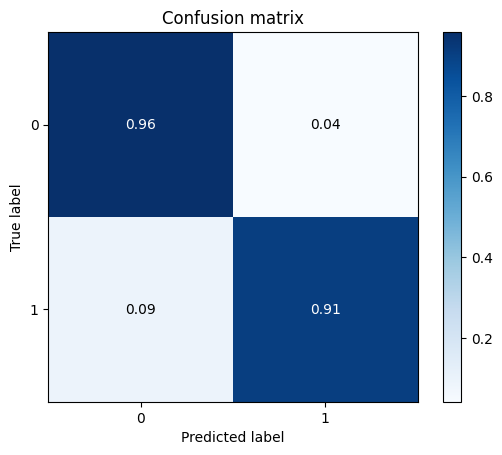

In [ ]:
# confusion matrix with normalization

cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=5)
# Calculate the average performance across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)


# calculate AUC for this model
probs = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probs)
print('The AUC score is: ', auc)

Mean Accuracy: 0.9315013196708586
The AUC score is:  0.9819849328529315


This version had an increase in true negatives, but a decrease in true positives (which is what we are prioritizing). The AUC is very slightly higher but the cross validation score is lower.

Let's try an iteration number between 500 (version 2) and 300 (version 4) as a last tuning check for this

In [ ]:
### VERSION 6 ###

# 400 iterations,  3-deep trees, and set loss function to log_loss (previously 'deviance')

params = {'n_estimators': 400,
          'max_depth': 3,
          'loss': 'log_loss'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Normalized confusion matrix


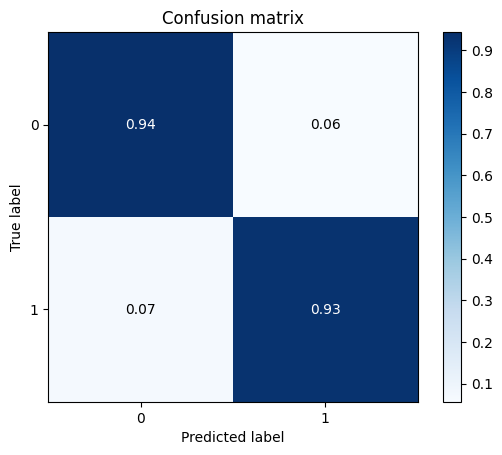

In [ ]:
# confusion matrix with normalization

cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=5)
# Calculate the average performance across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)


# calculate AUC for this model
probs = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probs)
print('The AUC score is: ', auc)

Mean Accuracy: 0.9332401800962584
The AUC score is:  0.9793645594497216


This version had the same confusion matrix and the same AUC as version 4, but a slightly lower cross validation score, so we will move forward with the parameters that we used for version 4.

Let's run version 4 again and look at the importance of the different features to see which we can drop to start

In [ ]:
### VERSION 4 ###

# 300 iterations,  3-deep trees, and set loss function to log_loss (previously 'deviance')

params = {'n_estimators': 300,
          'max_depth': 3,
          'loss': 'log_loss'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Text(0.5, 1.0, 'Variable Importance')

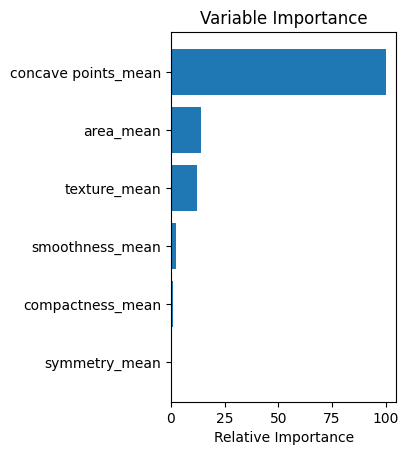

In [ ]:
# Get a measure of how important each of the features in the model was

feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

Symmetry and Compactness are the two lowest features, so we will remove those first

In [ ]:
### VERSION 7 ###

# set the target and predictors
y = mean_df_short3['diagnosis_bin']
X = mean_df_short3.drop(['diagnosis_bin', 'smoothness_mean', 'compactness_mean', 'symmetry_mean'], axis = 1)

#split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = .8)

In [ ]:
# 300 iterations,  3-deep trees, and set loss function to log_loss (previously 'deviance')

params = {'n_estimators': 300,
          'max_depth': 3,
          'loss': 'log_loss'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Normalized confusion matrix


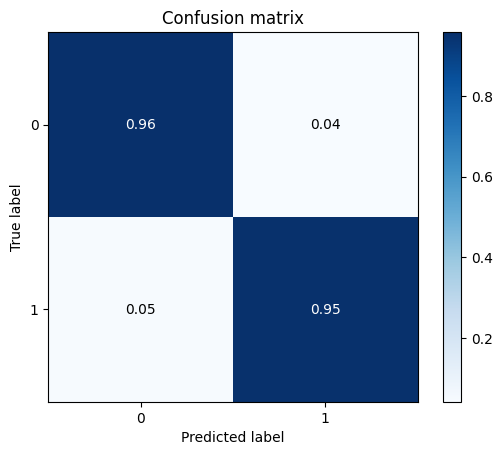

In [ ]:
# confusion matrix with normalization

cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=5)
# Calculate the average performance across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)


# calculate AUC for this model
probs = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probs)
print('The AUC score is: ', auc)

Mean Accuracy: 0.9279614966620089
The AUC score is:  0.983950212905339


Text(0.5, 1.0, 'Variable Importance')

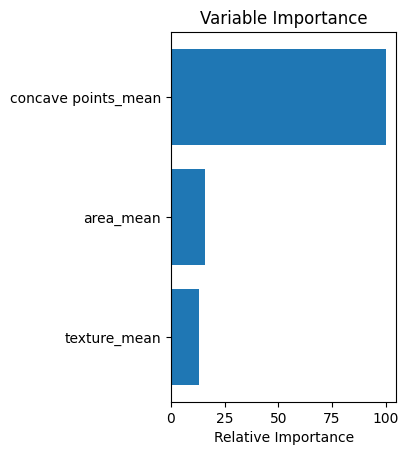

In [ ]:
# Get a measure of how important each of the features in the model was

feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

Version 7 of the model showed improved prediction for true negatives and true positives in the confusion matrix, and also had a higher AUC score, though a slightly lower cross validation score

Texture was the next lowest so let's remove that one next

In [ ]:
### VERSION 8 ###

# set the target and predictors
y = mean_df_short3['diagnosis_bin']
X = mean_df_short3.drop(['diagnosis_bin', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'texture_mean'], axis = 1)

#split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = .8)

In [ ]:
# 300 iterations,  3-deep trees, and set loss function to log_loss (previously 'deviance')

params = {'n_estimators': 300,
          'max_depth': 3,
          'loss': 'log_loss'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Normalized confusion matrix


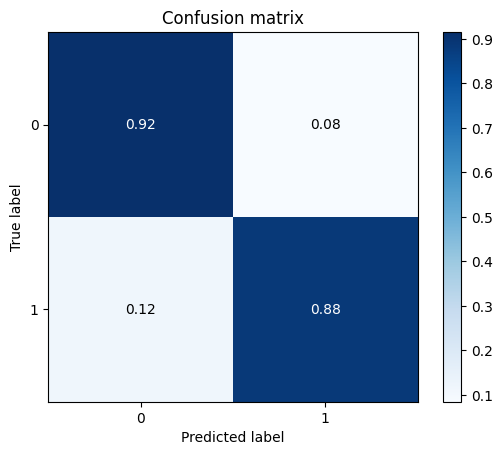

In [ ]:
# confusion matrix with normalization

cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=5)
# Calculate the average performance across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)


# calculate AUC for this model
probs = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probs)
print('The AUC score is: ', auc)

Mean Accuracy: 0.92094395280236
The AUC score is:  0.9636423190304619


Version 8 did not perform as well as version 7 in all categories  

Text(0.5, 1.0, 'Variable Importance')

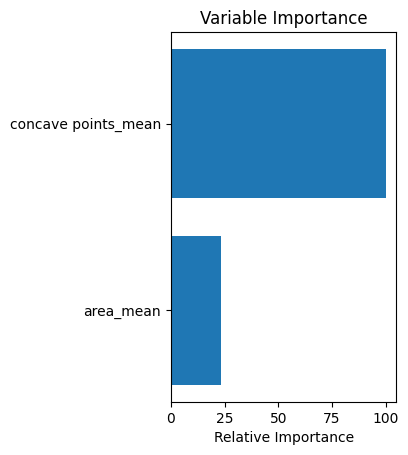

In [ ]:
# Get a measure of how important each of the features in the model was

feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

concave points represents almost 100% of importance for the model, so let's try using just that one variable to see how well the model performs

In [ ]:
### VERSION 9 ###

# set the target and predictors
y = mean_df_short3['diagnosis_bin']
X = mean_df_short3.drop(['diagnosis_bin', 'smoothness_mean', 'compactness_mean', 'smoothness_mean', 'symmetry_mean', 'area_mean'], axis = 1)

#split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = .8)

In [ ]:
# 300 iterations,  3-deep trees, and set loss function to log_loss (previously 'deviance')

params = {'n_estimators': 300,
          'max_depth': 3,
          'loss': 'log_loss'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

Normalized confusion matrix


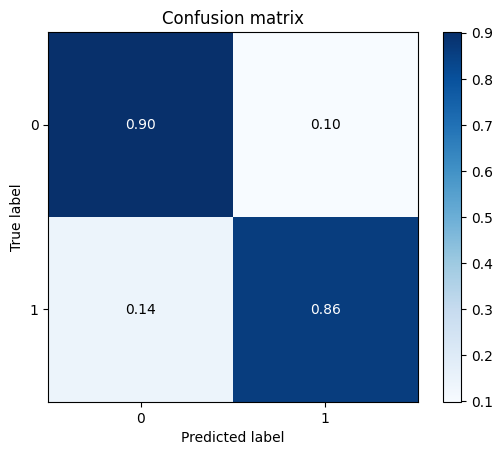

In [ ]:
# confusion matrix with normalization

cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)

In [ ]:
# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=5)
# Calculate the average performance across all folds
mean_accuracy = scores.mean()
print("Mean Accuracy:", mean_accuracy)


# calculate AUC for this model
probs = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, probs)
print('The AUC score is: ', auc)

Mean Accuracy: 0.92094395280236
The AUC score is:  0.9636423190304619


This model also did not perform as well as version 7, which seems to be the best version of this model.

Let's look at some other evaluation metrics for version 7.

In [ ]:
### VERSION 7 ###

# set the target and predictors
y = mean_df_short3['diagnosis_bin']
X = mean_df_short3.drop(['diagnosis_bin', 'smoothness_mean', 'compactness_mean', 'symmetry_mean'], axis = 1)

#split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = .8)

In [ ]:
# 300 iterations,  3-deep trees, and set loss function to log_loss (previously 'deviance')

params = {'n_estimators': 300,
          'max_depth': 3,
          'loss': 'log_loss'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [ ]:
# Calculate accuracy score
print('The accuracy score is: ', clf.score(X_test, y_test))

#calculate precision score
y_pred = clf.predict(X_test)
print('The precision score is: ', precision_score(y_test,y_pred))

# Calculate Recall score
print('The recall score is: ', recall_score(y_test,y_pred))

#calculate F-score
f1 = f1_score(y_test, y_pred)
fbeta_precision = fbeta_score(y_test, y_pred, beta=0.5)
fbeta_recall = fbeta_score(y_test, y_pred, beta=2)
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

The accuracy score is:  0.956140350877193
The precision score is:  0.9318181818181818
The recall score is:  0.9534883720930233
F1 score: 0.94
Fbeta score favoring precision: 0.94
FBeta score favoring recall: 0.95


# Choosing a model type

The initial SVC model did not perform as well as the random forest or gradient boosted models, and the model type did not seem as well suited to the data. The random forest and gradient boosted model types were better suited for the data and were more predictively powerful model types.

So let's compare the two best models for the Random Forest Classifier and the Gradient Boosted Classifier:



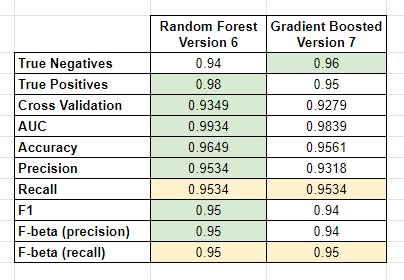

Comparing the various evaluation metrics that we looked at, both models performed very well, but the Random Forest model has higher or equal scores for everything but True Negatives. Since we want to prioritize reduction of false negatives, having a slightly lower score for the true negatives is fine. Overall the Random Forest appears to be the better model for this data.